In [330]:
import h5py
import numpy as np
from sklearn.utils import shuffle
np.random.seed(2018)

In [331]:
# train训练集、test测试集、validation验证集、train_label训练集标签、validation_label验证集标签
train = []
test = []
validation = []
train_label = []
validation_label = []

In [332]:
# 读取提取的特征
with h5py.File('Xception_feature_v1.h5', 'r') as h:
    train.append(np.array(h['train']))
    validation.append(np.array(h['validation']))
    test.append(np.array(h['test']))
    train_label = np.array(h['train_label'])
    validation_label = np.array(h['validation_label'])

In [333]:
train = np.concatenate(train, axis=1)
validation = np.concatenate(validation, axis=1)
test = np.concatenate(test, axis=1)
# print(X_test)

In [334]:
from keras.models import *
from keras.layers import *

In [335]:
input_tensor = Input(train.shape[1:])
x = input_tensor
# x = Dense(1024, activation='relu')(x)
# x = Dropout(0.5)(x)
# x = Dense(64, activation='relu')(x)
# 使用Dropout随机丢掉一部分特征
x = Dropout(0.7155)(x)
# 使用sigmoid作为激活函数
x = Dense(1, activation='sigmoid')(x)
model = Model(input_tensor, x)

# for layer in base_model.layers:
#     layer.trainable = False

# for layer in model.layers[:2]:
#    layer.trainable = False
# for layer in model.layers[2:]:
#    layer.trainable = True

for i, layer in enumerate(model.layers):
   print(i, layer.name)
    
# 使用RMSprop优化器
model.compile(optimizer='RMSprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

0 input_31
1 dropout_34
2 dense_41


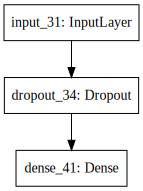

In [336]:
# 模型可视化
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [337]:
hist = model.fit(train, train_label,
          epochs=30,
          batch_size=128,
          validation_data=(validation, validation_label))

Train on 19940 samples, validate on 4985 samples
Epoch 1/30
19940/19940 [==============================] - 1s 55us/step - loss: 0.1297 - acc: 0.9740 - val_loss: 0.0293 - val_acc: 0.9938
Epoch 2/30
19940/19940 [==============================] - 0s 21us/step - loss: 0.0334 - acc: 0.9914 - val_loss: 0.0198 - val_acc: 0.9942
Epoch 3/30
19940/19940 [==============================] - 0s 21us/step - loss: 0.0257 - acc: 0.9928 - val_loss: 0.0170 - val_acc: 0.9936
Epoch 4/30
19940/19940 [==============================] - 0s 21us/step - loss: 0.0250 - acc: 0.9930 - val_loss: 0.0158 - val_acc: 0.9940
Epoch 5/30
19940/19940 [==============================] - 0s 21us/step - loss: 0.0235 - acc: 0.9932 - val_loss: 0.0153 - val_acc: 0.9948
Epoch 6/30
19940/19940 [==============================] - 0s 21us/step - loss: 0.0225 - acc: 0.9935 - val_loss: 0.0150 - val_acc: 0.9950
Epoch 7/30
19940/19940 [==============================] - 0s 21us/step - loss: 0.0215 - acc: 0.9937 - val_loss: 0.0152 - val_acc:

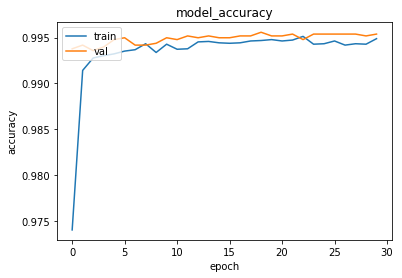

In [338]:
import matplotlib.pyplot as plt
fig = plt.figure()  
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
#设置标题  
plt.title('model_accuracy') 
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

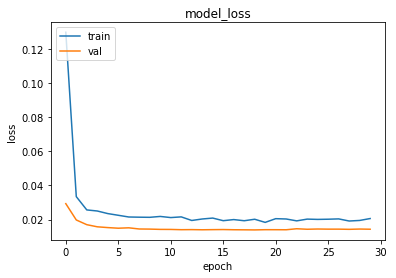

In [339]:
import matplotlib.pyplot as plt
fig = plt.figure()  
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
#设置标题  
plt.title('model_loss') 
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [340]:
y_pred = model.predict(test)
y_pred = y_pred.clip(min=0.005, max=0.995)
print(y_pred)

[[0.995]
 [0.005]
 [0.005]
 ...
 [0.995]
 [0.005]
 [0.005]]


In [341]:
import pandas as pd
from keras.preprocessing.image import *

In [342]:
df = pd.read_csv("data/sample_submission.csv")
# df.head(8)

test_gen = ImageDataGenerator()
test_generator = test_gen.flow_from_directory("data/test", (299, 299), shuffle=False,
                                         batch_size=64, class_mode=None)

for i, fname in enumerate(test_generator.filenames):
    # print(i, fname, y_pred[i])
    index = int(fname[fname.rfind('/')+1:fname.rfind('.')])      
#     print(index-1, y_pred[i])
    df.set_value(index-1, 'label', y_pred[i])   
# index=None，将index不写入csv文件
# df.to_csv('pred.csv')
# df.to_csv('pred.csv', index=None)
df.to_csv('pred16.csv', index=None)
df.head(8)

Found 12500 images belonging to 1 classes.


,id,label
0,1,0.995
1,2,0.995
2,3,0.995
3,4,0.995
4,5,0.005
5,6,0.005
6,7,0.005
7,8,0.005
